<a href="https://colab.research.google.com/github/rigolabbe/desafioLATAMg69/blob/main/RAL_Manipulaci%C3%B3n_y_transformaci%C3%B3n_de_datos_parte_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Para resolver este desafío deberás cargar datos desde Hojas de Excel del archivo
 US_Regional_Sales_Data.xlsx. En base a esto, debe generar una visualización de datos
 comola que se muestra en las hojas Reporte1 y Reporte2 del archivo reporte.xlsx.
 Para cumplir con lo solicitado, puedes aplicar los siguientes pasos:

In [8]:
# RESÍESTA 1. Carga los datos de cada pestaña del archivo US_Regional_Sales_Data.xlsx en un
 #DataFrame independiente. (hint: Puedes obtener los nombres de las hojas usando
 #pd.ExcelFile(archivo).sheet_names)#

#IMPORTAMOS LAS LIBRERIAS PARA TRABAJAR
import pandas as pd
import numpy as np

# PREGUNTA A. Carga los datos y crea un DataFrame con cada uno de ellos.
# Revisamos os nombres de las hokjas de la planilla excel

path_xl = pd.ExcelFile("/content/sample_data/US_Regional_Sales_Data.xlsx")
#print(path_xl.sheet_names)  # see all sheet names

# se crean loa dataframe correspondientes a cada hoja
df_sales_orders_sheet = pd.read_excel(path_xl, "Sales Orders Sheet" )
df_customers_sheet = pd.read_excel(path_xl, "Customers Sheet" )
df_store_location_sheet = pd.read_excel(path_xl, "Store Locations Sheet" )
df_product_sheet = pd.read_excel(path_xl, "Products Sheet" )
df_sales_team_sheet = pd.read_excel(path_xl, "Sales Team Sheet" )



### RESPUESTA 2  .2. Cruza todos los DataFrames usando validación many_to_one, y guarda el resultado

---



---


 #en una nueva variable llamada df_base.

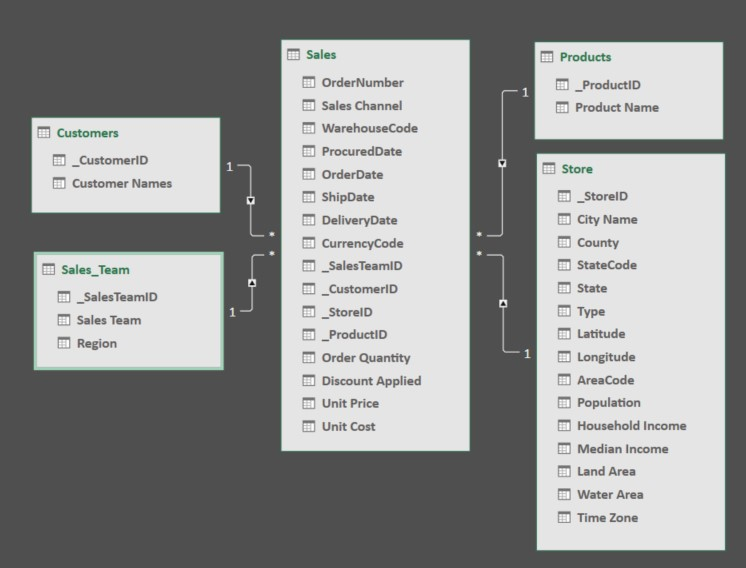

In [10]:
# se realiza una construccion visual  del modelo planteado para
# entender las tablas y sus relaciones ,  se visualiza un modelo ESTRELLA
#con tabla prrincipal Sales  y sus cuatro dimensiones  customer. sales_team, products y store

# Se realizarn los cruces  para generar  la relaciones

#merged_inner = pd.merge(left=df_sales_orders_sheet, right=df_customers_sheet, left_on='CustomersID', right_on='CustomersID')
df_base = pd.merge(df_sales_orders_sheet, df_customers_sheet, how="inner", on="_CustomerID" , validate="many_to_one")
df_base =  pd.merge(df_base, df_store_location_sheet, how="inner", on="_StoreID" , validate="many_to_one")
df_base =  pd.merge(df_base, df_product_sheet, how="inner", on="_ProductID" , validate="many_to_one")
df_base =  pd.merge(df_base, df_sales_team_sheet, how="inner", on="_SalesTeamID" , validate="many_to_one")
#df_base = pd.merge("df_sales_orders_sheet", "df_customers_sheet", "df_store_location_sheet", "df_product_sheet", "df_sales_team_sheet"   validate ="many_to_one")
print("\muestra los dataframes cruzados en salida df_base ...\n", df_base.info)



\muestra los dataframes cruzados en salida df_base ...
 <bound method DataFrame.info of        OrderNumber Sales Channel WarehouseCode ProcuredDate  OrderDate  \
0      SO - 000101      In-Store  WARE-UHY1004   2017-12-31 2018-05-31   
1     SO - 0002491      In-Store  WARE-NMK1003   2018-10-27 2019-03-06   
2     SO - 0001458      In-Store  WARE-NMK1003   2018-07-19 2018-11-09   
3     SO - 0005166      In-Store  WARE-PUJ1005   2019-08-23 2020-01-22   
4     SO - 0002439      In-Store  WARE-UHY1004   2018-10-27 2019-02-26   
...            ...           ...           ...          ...        ...   
7986  SO - 0003465      In-Store  WARE-PUJ1005   2019-05-15 2019-06-30   
7987  SO - 0002097      In-Store  WARE-MKL1006   2018-10-27 2019-01-16   
7988  SO - 0001648      In-Store  WARE-NMK1003   2018-07-19 2018-12-02   
7989  SO - 0006241      In-Store  WARE-XYS1001   2019-12-01 2020-05-29   
7990   SO - 000645      In-Store  WARE-PUJ1005   2018-04-10 2018-08-04   

       ShipDate Deliver

Agrega las siguientes columnas a df_ base:

In [11]:
# verificacmos las filas duplicadas
df_base.duplicated()

# No existen columnas duplicadas realizamos los calculos  para nuevas columnas

df_base["ProcurementDays"] = df_base.OrderDate - df_base.ProcuredDate
df_base["ShippingDays"] = df_base.ShipDate - df_base.OrderDate
df_base["DeliveryDays"] = df_base.DeliveryDate - df_base.ShipDate
df_base["CustomerDays"] = df_base.ShippingDays + df_base.DeliveryDays

df_base.CustomerDays

0      19 days
1      24 days
2       8 days
3       9 days
4      12 days
         ...  
7986   32 days
7987   38 days
7988   27 days
7989   13 days
7990   29 days
Name: CustomerDays, Length: 7991, dtype: timedelta64[ns]

4. Agrega una nueva columna discreta al df_base, con el nombre CustomerDaysInterval
 que clasifique los valores de la columna CustomerDays en los siguientes intervalos:
  ○ 0to15days
 ○ 15to30days
 ○ 30to45days
 ○ 45to60days
 ○ 60to75days
 ○ 75to90days

In [12]:
#EXISTE ERRORES EN LOS RANGOS DADO QUE LAS FECHAS DEL EXCEL NO
#TIENE FECHA/ HORA  NO ES POSIBLE CATEGORIZAR LOS RANGOS DESCRITOS
#DADO QUE AMBOS RANGOS CNTIENEN VALORES EN COMUN LA HORA ES FUNDAMENTAL PARA
#HACER LA CATEGORIZACION  AL NO TENER HORA SE MODIFCAN LOS RANGOS A
#  0 TO 15
# 16 TO 30
# 31 TO 45
# 46 TO 60
# 61 TO 75
# 76 TO 90

def get_intervalo(registro):

 if registro >= 0  and  registro <= 15:
   retorno = "0 to 15 days"
 elif registro >= 16  and  registro <= 30:
   retorno = "16 to 30 days"
 elif registro >= 31  and  registro <= 45:
   retorno = "31 to 45 days"
 elif registro >= 46  and  registro <= 60:
   retorno = "46 to 60 days"
 elif registro >= 61  and  registro <= 75:
   retorno = "61 to 75 days"
 else:
   retorno = "61 to 75 days"
 return retorno

#aca  creamnos las columna nueva al df y asignamos los vaores segun las funcion creada de intervalos
df_base["CustomerDaysInterval"] = pd.to_numeric(df_base["CustomerDays"].dt.days, downcast='integer').apply(get_intervalo)
#df_base["CustomerDaysInterval"] = df_base["CustomerDays"].apply(get_intervalo)
df_base

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,...,Water Area,Time Zone,Product Name,Sales Team,Region,ProcurementDays,ShippingDays,DeliveryDays,CustomerDays,CustomerDaysInterval
0,SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-14,2018-06-19,USD,6,15,...,160302131,America/New York,Dining Furniture,Joshua Bennett,Northeast,151 days,14 days,5 days,19 days,16 to 30 days
1,SO - 0002491,In-Store,WARE-NMK1003,2018-10-27,2019-03-06,2019-03-25,2019-03-30,USD,6,11,...,14488557,America/New York,Dining Furniture,Joshua Bennett,Northeast,130 days,19 days,5 days,24 days,16 to 30 days
2,SO - 0001458,In-Store,WARE-NMK1003,2018-07-19,2018-11-09,2018-11-11,2018-11-17,USD,6,12,...,947196,America/Denver,Dining Furniture,Joshua Bennett,Northeast,113 days,2 days,6 days,8 days,0 to 15 days
3,SO - 0005166,In-Store,WARE-PUJ1005,2019-08-23,2020-01-22,2020-01-28,2020-01-31,USD,6,7,...,31362925,America/New York,Dining Furniture,Joshua Bennett,Northeast,152 days,6 days,3 days,9 days,0 to 15 days
4,SO - 0002439,In-Store,WARE-UHY1004,2018-10-27,2019-02-26,2019-03-06,2019-03-10,USD,6,33,...,0,America/Los Angeles,Dining Furniture,Joshua Bennett,Northeast,122 days,8 days,4 days,12 days,0 to 15 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,SO - 0003465,In-Store,WARE-PUJ1005,2019-05-15,2019-06-30,2019-07-27,2019-08-01,USD,11,35,...,3788915,America/Chicago,Pillows,Joshua Little,South,46 days,27 days,5 days,32 days,31 to 45 days
7987,SO - 0002097,In-Store,WARE-MKL1006,2018-10-27,2019-01-16,2019-02-13,2019-02-23,USD,11,39,...,3870729,America/Chicago,Pillows,Joshua Little,South,81 days,28 days,10 days,38 days,31 to 45 days
7988,SO - 0001648,In-Store,WARE-NMK1003,2018-07-19,2018-12-02,2018-12-22,2018-12-29,USD,11,17,...,2423679,America/Chicago,Pillows,Joshua Little,South,136 days,20 days,7 days,27 days,16 to 30 days
7989,SO - 0006241,In-Store,WARE-XYS1001,2019-12-01,2020-05-29,2020-06-04,2020-06-11,USD,11,44,...,1950781,America/Phoenix,Bathroom Furniture,Joshua Little,South,180 days,6 days,7 days,13 days,0 to 15 days


 5. Utiliza una tabla pivote para mostrar el conteo de órdenes agrupando por Sales
 Team en las filas y CustomerDaysInterval en las columnas. Este reporte debe
 cuadrar con los datos de la pestaña Reporte1 del archivo reportes.xlsx

In [13]:
# creamos la tabla pivote  contando los casos
#  se verifican los datos con reporte y cuadran perfectamente
df_base.pivot_table(index = "Sales Team", columns = "CustomerDaysInterval", values ="OrderNumber", aggfunc = "count")

CustomerDaysInterval,0 to 15 days,16 to 30 days,31 to 45 days
Sales Team,,,
Adam Hernandez,81,179,42
Anthony Berry,76,181,41
Anthony Torres,81,162,45
Carl Nguyen,96,178,40
Carlos Miller,65,148,34
Chris Armstrong,92,156,44
Donald Reynolds,97,163,36
Douglas Tucker,87,145,45
Frank Brown,85,150,40


Agrega la siguiente columna calculada a la base:

In [14]:
#generamos la nueva columna
#Profesor aca el calculo esta bien , peor por algun motivo esta muy bajo respecto alo revisado en la ultima tabla , nose si tiene
#que ver con mi configuracion del pc  (separadr de miles .  o ,  )

df_base['GrossMargin'] = df_base['Order Quantity'] * (df_base['Unit Price'] * (1-df_base['Discount Applied'])-df_base['Unit Cost'])
df_base


,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,...,Time Zone,Product Name,Sales Team,Region,ProcurementDays,ShippingDays,DeliveryDays,CustomerDays,CustomerDaysInterval,GrossMargin
0,SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-14,2018-06-19,USD,6,15,...,America/New York,Dining Furniture,Joshua Bennett,Northeast,151 days,14 days,5 days,19 days,16 to 30 days,4073.4325
1,SO - 0002491,In-Store,WARE-NMK1003,2018-10-27,2019-03-06,2019-03-25,2019-03-30,USD,6,11,...,America/New York,Dining Furniture,Joshua Bennett,Northeast,130 days,19 days,5 days,24 days,16 to 30 days,1988.0910
2,SO - 0001458,In-Store,WARE-NMK1003,2018-07-19,2018-11-09,2018-11-11,2018-11-17,USD,6,12,...,America/Denver,Dining Furniture,Joshua Bennett,Northeast,113 days,2 days,6 days,8 days,0 to 15 days,2185.2720
3,SO - 0005166,In-Store,WARE-PUJ1005,2019-08-23,2020-01-22,2020-01-28,2020-01-31,USD,6,7,...,America/New York,Dining Furniture,Joshua Bennett,Northeast,152 days,6 days,3 days,9 days,0 to 15 days,4296.3750
4,SO - 0002439,In-Store,WARE-UHY1004,2018-10-27,2019-02-26,2019-03-06,2019-03-10,USD,6,33,...,America/Los Angeles,Dining Furniture,Joshua Bennett,Northeast,122 days,8 days,4 days,12 days,0 to 15 days,1118.5650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,SO - 0003465,In-Store,WARE-PUJ1005,2019-05-15,2019-06-30,2019-07-27,2019-08-01,USD,11,35,...,America/Chicago,Pillows,Joshua Little,South,46 days,27 days,5 days,32 days,31 to 45 days,643.8700
7987,SO - 0002097,In-Store,WARE-MKL1006,2018-10-27,2019-01-16,2019-02-13,2019-02-23,USD,11,39,...,America/Chicago,Pillows,Joshua Little,South,81 days,28 days,10 days,38 days,31 to 45 days,763.8000
7988,SO - 0001648,In-Store,WARE-NMK1003,2018-07-19,2018-12-02,2018-12-22,2018-12-29,USD,11,17,...,America/Chicago,Pillows,Joshua Little,South,136 days,20 days,7 days,27 days,16 to 30 days,1763.1720
7989,SO - 0006241,In-Store,WARE-XYS1001,2019-12-01,2020-05-29,2020-06-04,2020-06-11,USD,11,44,...,America/Phoenix,Bathroom Furniture,Joshua Little,South,180 days,6 days,7 days,13 days,0 to 15 days,1917.5400


 7. En esta parte debes aplicar un porcentaje a la columna GrossMargin, pero ese
 porcentaje dependerá del intervalo en que se encuentre GrossMargin.

In [15]:
def get_comision(comi):

 if comi >= 0  and  comi <= 100:
   retorno =  0.05
 elif comi >= 101  and  comi <= 1000:
   retorno = 0.1
 elif comi >= 1001  and  comi <= 10000:
   retorno = 0.15
 elif comi >= 10001  and  comi <= 100000:
   retorno = 0.20
 else:
   retorno = 0
 return retorno
#aca  creamnos las columna nueva al df y asignamos los vaores segun las funcion creada de intervalos

df_base["CommissionsPercentage"] = df_base["GrossMargin"].apply(get_comision) * 100  # .apply(get_comision)


#df_base["CustomerDaysInterval"] = df_base["CustomerDays"].apply(get_intervalo)
df_base

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,...,Product Name,Sales Team,Region,ProcurementDays,ShippingDays,DeliveryDays,CustomerDays,CustomerDaysInterval,GrossMargin,CommissionsPercentage
0,SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-14,2018-06-19,USD,6,15,...,Dining Furniture,Joshua Bennett,Northeast,151 days,14 days,5 days,19 days,16 to 30 days,4073.4325,15.0
1,SO - 0002491,In-Store,WARE-NMK1003,2018-10-27,2019-03-06,2019-03-25,2019-03-30,USD,6,11,...,Dining Furniture,Joshua Bennett,Northeast,130 days,19 days,5 days,24 days,16 to 30 days,1988.0910,15.0
2,SO - 0001458,In-Store,WARE-NMK1003,2018-07-19,2018-11-09,2018-11-11,2018-11-17,USD,6,12,...,Dining Furniture,Joshua Bennett,Northeast,113 days,2 days,6 days,8 days,0 to 15 days,2185.2720,15.0
3,SO - 0005166,In-Store,WARE-PUJ1005,2019-08-23,2020-01-22,2020-01-28,2020-01-31,USD,6,7,...,Dining Furniture,Joshua Bennett,Northeast,152 days,6 days,3 days,9 days,0 to 15 days,4296.3750,15.0
4,SO - 0002439,In-Store,WARE-UHY1004,2018-10-27,2019-02-26,2019-03-06,2019-03-10,USD,6,33,...,Dining Furniture,Joshua Bennett,Northeast,122 days,8 days,4 days,12 days,0 to 15 days,1118.5650,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,SO - 0003465,In-Store,WARE-PUJ1005,2019-05-15,2019-06-30,2019-07-27,2019-08-01,USD,11,35,...,Pillows,Joshua Little,South,46 days,27 days,5 days,32 days,31 to 45 days,643.8700,10.0
7987,SO - 0002097,In-Store,WARE-MKL1006,2018-10-27,2019-01-16,2019-02-13,2019-02-23,USD,11,39,...,Pillows,Joshua Little,South,81 days,28 days,10 days,38 days,31 to 45 days,763.8000,10.0
7988,SO - 0001648,In-Store,WARE-NMK1003,2018-07-19,2018-12-02,2018-12-22,2018-12-29,USD,11,17,...,Pillows,Joshua Little,South,136 days,20 days,7 days,27 days,16 to 30 days,1763.1720,15.0
7989,SO - 0006241,In-Store,WARE-XYS1001,2019-12-01,2020-05-29,2020-06-04,2020-06-11,USD,11,44,...,Bathroom Furniture,Joshua Little,South,180 days,6 days,7 days,13 days,0 to 15 days,1917.5400,15.0


8. Calcula el monto de la comisión, utilizando la Tabla del Anexo.

In [16]:
#genera el calculo correctamente de  de crossMarging suma el  % de comision

df_base["CommissionsAmount"] =  df_base["GrossMargin"] * df_base["GrossMargin"].apply(get_comision)

df_base

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,...,Sales Team,Region,ProcurementDays,ShippingDays,DeliveryDays,CustomerDays,CustomerDaysInterval,GrossMargin,CommissionsPercentage,CommissionsAmount
0,SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-14,2018-06-19,USD,6,15,...,Joshua Bennett,Northeast,151 days,14 days,5 days,19 days,16 to 30 days,4073.4325,15.0,611.014875
1,SO - 0002491,In-Store,WARE-NMK1003,2018-10-27,2019-03-06,2019-03-25,2019-03-30,USD,6,11,...,Joshua Bennett,Northeast,130 days,19 days,5 days,24 days,16 to 30 days,1988.0910,15.0,298.213650
2,SO - 0001458,In-Store,WARE-NMK1003,2018-07-19,2018-11-09,2018-11-11,2018-11-17,USD,6,12,...,Joshua Bennett,Northeast,113 days,2 days,6 days,8 days,0 to 15 days,2185.2720,15.0,327.790800
3,SO - 0005166,In-Store,WARE-PUJ1005,2019-08-23,2020-01-22,2020-01-28,2020-01-31,USD,6,7,...,Joshua Bennett,Northeast,152 days,6 days,3 days,9 days,0 to 15 days,4296.3750,15.0,644.456250
4,SO - 0002439,In-Store,WARE-UHY1004,2018-10-27,2019-02-26,2019-03-06,2019-03-10,USD,6,33,...,Joshua Bennett,Northeast,122 days,8 days,4 days,12 days,0 to 15 days,1118.5650,15.0,167.784750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,SO - 0003465,In-Store,WARE-PUJ1005,2019-05-15,2019-06-30,2019-07-27,2019-08-01,USD,11,35,...,Joshua Little,South,46 days,27 days,5 days,32 days,31 to 45 days,643.8700,10.0,64.387000
7987,SO - 0002097,In-Store,WARE-MKL1006,2018-10-27,2019-01-16,2019-02-13,2019-02-23,USD,11,39,...,Joshua Little,South,81 days,28 days,10 days,38 days,31 to 45 days,763.8000,10.0,76.380000
7988,SO - 0001648,In-Store,WARE-NMK1003,2018-07-19,2018-12-02,2018-12-22,2018-12-29,USD,11,17,...,Joshua Little,South,136 days,20 days,7 days,27 days,16 to 30 days,1763.1720,15.0,264.475800
7989,SO - 0006241,In-Store,WARE-XYS1001,2019-12-01,2020-05-29,2020-06-04,2020-06-11,USD,11,44,...,Joshua Little,South,180 days,6 days,7 days,13 days,0 to 15 days,1917.5400,15.0,287.631000


 9. Calcula la comisión sobre el margen bruto.

In [17]:
df_base["NetMargin"] = df_base["GrossMargin"] - df_base["CommissionsAmount"]
df_base

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,...,Region,ProcurementDays,ShippingDays,DeliveryDays,CustomerDays,CustomerDaysInterval,GrossMargin,CommissionsPercentage,CommissionsAmount,NetMargin
0,SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-14,2018-06-19,USD,6,15,...,Northeast,151 days,14 days,5 days,19 days,16 to 30 days,4073.4325,15.0,611.014875,3462.417625
1,SO - 0002491,In-Store,WARE-NMK1003,2018-10-27,2019-03-06,2019-03-25,2019-03-30,USD,6,11,...,Northeast,130 days,19 days,5 days,24 days,16 to 30 days,1988.0910,15.0,298.213650,1689.877350
2,SO - 0001458,In-Store,WARE-NMK1003,2018-07-19,2018-11-09,2018-11-11,2018-11-17,USD,6,12,...,Northeast,113 days,2 days,6 days,8 days,0 to 15 days,2185.2720,15.0,327.790800,1857.481200
3,SO - 0005166,In-Store,WARE-PUJ1005,2019-08-23,2020-01-22,2020-01-28,2020-01-31,USD,6,7,...,Northeast,152 days,6 days,3 days,9 days,0 to 15 days,4296.3750,15.0,644.456250,3651.918750
4,SO - 0002439,In-Store,WARE-UHY1004,2018-10-27,2019-02-26,2019-03-06,2019-03-10,USD,6,33,...,Northeast,122 days,8 days,4 days,12 days,0 to 15 days,1118.5650,15.0,167.784750,950.780250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,SO - 0003465,In-Store,WARE-PUJ1005,2019-05-15,2019-06-30,2019-07-27,2019-08-01,USD,11,35,...,South,46 days,27 days,5 days,32 days,31 to 45 days,643.8700,10.0,64.387000,579.483000
7987,SO - 0002097,In-Store,WARE-MKL1006,2018-10-27,2019-01-16,2019-02-13,2019-02-23,USD,11,39,...,South,81 days,28 days,10 days,38 days,31 to 45 days,763.8000,10.0,76.380000,687.420000
7988,SO - 0001648,In-Store,WARE-NMK1003,2018-07-19,2018-12-02,2018-12-22,2018-12-29,USD,11,17,...,South,136 days,20 days,7 days,27 days,16 to 30 days,1763.1720,15.0,264.475800,1498.696200
7989,SO - 0006241,In-Store,WARE-XYS1001,2019-12-01,2020-05-29,2020-06-04,2020-06-11,USD,11,44,...,South,180 days,6 days,7 days,13 days,0 to 15 days,1917.5400,15.0,287.631000,1629.909000


10. Utilizando una tabla pivote, muestra la suma de los valores GrossMargin, NetMargin y
 CommissionAmount agrupando por Sales Team en las filas. Este reporte debe cuadrar con
 los datos de la pestaña Reporte2 del archivo reportes.xlsx

In [18]:
#  si bien los calculos se ven coeremntes  ,  por algun motivo estan muy bajos respecto a lo que se
# encuentra en el segundo reporte de excel.   creo que algo paso en la carga de los archivos.
# i

df_base.pivot_table(index = "Sales Team",  values =["GrossMargin" ,"CommissionsAmount", "NetMargin" ]  , aggfunc = "sum")

,CommissionsAmount,GrossMargin,NetMargin
Sales Team,,,
Adam Hernandez,126637.207525,779095.1955,652457.987975
Anthony Berry,123911.034475,767943.9500,644032.915525
Anthony Torres,117952.128175,743901.4355,625949.307325
Carl Nguyen,123843.212050,774781.4675,650938.255450
Carlos Miller,110882.093875,668752.9290,557870.835125
Chris Armstrong,122565.707975,781608.7005,659042.992525
Donald Reynolds,143768.338700,885386.8095,741618.470800
Douglas Tucker,120796.326750,745528.5640,624732.237250
Frank Brown,104839.466050,670881.2510,566041.784950
